# Problem Statement

The climbing rates of international trades and financial developments have been pegged to the exchange rate
for some time now. Moreso in developing countries, the input structure of production depends on imported capital and intermeediate 
goods, so an increase in exchange rates makes import production inputs more expensive and thus negatively affects
economic growth.

# introduction

In finance,  foreign-exchange rate (also known as forex rate, or rate) between two currencies is the
rate at which one currency will be exchanged for another. It is also regarded as the value of one country’s currency 
in terms of another currency. [1]  For example, one can swap the U.S. dollar for the euro. [2]

Foreign exchange transactions can take place on the foreign exchange market, also known as the forex market. 
The forex market is an electronic network of banks, brokers, institutions, and individual traders (mostly trading through 
brokers or banks). The forex market also determines the value, also known as an exchange rate, of the majority of currencies. [2]

When trading currencies, they are listed in pairs, such as USD/CAD, EUR/USD, or USD/JPY. These represent the U.S. dollar (USD) versus the Canadian dollar (CAD), the euro (EUR) versus the USD, and the USD versus the Japanese yen (JPY) [2]


There will also be a price associated with each pair, such as 1.2569. If this price was associated with the USD/CAD pair, it means that it costs 1.2569 CAD to buy one USD. If the price increases to 1.3336, then it now costs 1.3336 CAD to buy one USD. The USD has increased in value (CAD decrease) because it now costs more CAD to buy one USD [2]

 According to the latest triennial survey conducted by the Bank for International Settlements (BIS), trading in foreign exchange markets averaged $6.6 trillion per day in 2019[3]



The relationship between a nation’s imports and exports and its exchange rate is complicated because there is a constant feedback loop between international trade and the way a country's currency is valued. The exchange rate has an effect on the trade surplus or deficit, which in turn affects the exchange rate, and so on. In general, however, a weaker domestic currency stimulates exports and makes imports more expensive. Conversely, a strong domestic currency hampers exports and makes imports cheaper.[4]




source:

1. https://courses.lumenlearning.com/boundless-economics/chapter/exchange-rates/


2. https://www.investopedia.com/terms/f/foreign-exchange.asp

3. Bank for International Settlements. "Foreign Exchange Turnover in April 2019," Page 10. Accessed Dec. 31, 2021.

4. Congressional Research Service. "The Dollar and the U.S. Trade Deficit," Page 1. Accessed Jan. 30, 2022.

In this project i will be considering the top 4 foreign currency pairs at 2019 with USD the the quote currency.
The currency's pairs are:
1. EUR/USD (euro/US dollar)
2. GBP/USD (British pound/US dollar)
3. NZD/USD (New Zealand dollar/US dollar )
4. AUD/USD (Australian dollar/US dollar)  

source:

https://www.investopedia.com/ask/answers/06/maincurrencypairs.asp

In [3]:
#importing modules 
from fbprophet import Prophet
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_absolute_error, mean_squared_error

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
#reading data and checking the top 5
df = pd.read_csv('C:/Users/Pleasant/Desktop/Hamoye/Stage B/Premier project/archive/Foreign_Exchange_Rates.csv')
df.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,INDIA - INDIAN RUPEE/US$,KOREA - WON/US$,MEXICO - MEXICAN PESO/US$,SOUTH AFRICA - RAND/US$,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,43.55,1128,9.4015,6.126,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,43.55,1122.5,9.457,6.085,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,43.55,1135,9.535,6.07,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,43.55,1146.5,9.567,6.08,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,43.55,1138,9.52,6.057,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [5]:
#listing out columns that are needed
columns_needed =  ['Time Serie','EURO AREA - EURO/US$','UNITED KINGDOM - UNITED KINGDOM POUND/US$','NEW ZEALAND - NEW ZELAND DOLLAR/US$',
                  'AUSTRALIA - AUSTRALIAN DOLLAR/US$']

In [6]:
#filtering out columns that are bot needed and keepig the ones that are needed
df = df[columns_needed]
df.head()

,Time Serie,EURO AREA - EURO/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,AUSTRALIA - AUSTRALIAN DOLLAR/US$
0,2000-01-03,0.9847,0.6146,1.9033,1.5172
1,2000-01-04,0.97,0.6109,1.9238,1.5239
2,2000-01-05,0.9676,0.6092,1.9339,1.5267
3,2000-01-06,0.9686,0.607,1.9436,1.5291
4,2000-01-07,0.9714,0.6104,1.938,1.5272


In [7]:
#the shape of the dataset
df.shape

(5217, 5)

In [8]:
#info anout the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Time Serie                                 5217 non-null   object
 1   EURO AREA - EURO/US$                       5217 non-null   object
 2   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5217 non-null   object
 3   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5217 non-null   object
 4   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5217 non-null   object
dtypes: object(5)
memory usage: 203.9+ KB


In [9]:
#converting the time sereie columns to a date datatype
df['Time Serie'] = pd.to_datetime(df['Time Serie'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Data columns (total 5 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   Time Serie                                 5217 non-null   datetime64[ns]
 1   EURO AREA - EURO/US$                       5217 non-null   object        
 2   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5217 non-null   object        
 3   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5217 non-null   object        
 4   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5217 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 203.9+ KB


In [10]:
#feature engineering
#creating year, month and quater column from the time serie column
df['Year'] = df['Time Serie'].dt.year
df['Month'] = df['Time Serie'].dt.month
df['Quater'] = df['Time Serie'].dt.quarter
df.set_index('Time Serie',  inplace=True)
df.head()

,EURO AREA - EURO/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,AUSTRALIA - AUSTRALIAN DOLLAR/US$,Year,Month,Quater
Time Serie,,,,,,,
2000-01-03,0.9847,0.6146,1.9033,1.5172,2000,1,1
2000-01-04,0.97,0.6109,1.9238,1.5239,2000,1,1
2000-01-05,0.9676,0.6092,1.9339,1.5267,2000,1,1
2000-01-06,0.9686,0.607,1.9436,1.5291,2000,1,1
2000-01-07,0.9714,0.6104,1.938,1.5272,2000,1,1


In [11]:
#checking for abnormal value
nd_index_list = df.index[df['AUSTRALIA - AUSTRALIAN DOLLAR/US$'] == 'ND']
nd_index_list

DatetimeIndex(['2000-01-17', '2000-02-21', '2000-05-29', '2000-07-04',
               '2000-09-04', '2000-10-09', '2000-11-23', '2000-12-25',
               '2001-01-01', '2001-01-15',
               ...
               '2019-01-21', '2019-02-18', '2019-02-20', '2019-05-27',
               '2019-07-04', '2019-09-02', '2019-10-14', '2019-11-11',
               '2019-11-28', '2019-12-25'],
              dtype='datetime64[ns]', name='Time Serie', length=198, freq=None)

In [12]:
#droping the ND value
df.drop(nd_index_list, axis=0, inplace =True)
assert df[df['AUSTRALIA - AUSTRALIAN DOLLAR/US$'] == 'ND'].shape[0] == 0

In [13]:

df.shape

(5019, 7)

In [14]:
#confirm if ND is still in the dataframe
df.isin(['ND']).sum()

EURO AREA - EURO/US$                         0
UNITED KINGDOM - UNITED KINGDOM POUND/US$    0
NEW ZEALAND - NEW ZELAND DOLLAR/US$          0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            0
Year                                         0
Month                                        0
Quater                                       0
dtype: int64

In [15]:
#converting the currencies columns to numeric datatype
for column in df.columns.drop(['Year', 'Quater', 'Month']):
    df[column] = pd.to_numeric(df[column])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5019 entries, 2000-01-03 to 2019-12-31
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   EURO AREA - EURO/US$                       5019 non-null   float64
 1   UNITED KINGDOM - UNITED KINGDOM POUND/US$  5019 non-null   float64
 2   NEW ZEALAND - NEW ZELAND DOLLAR/US$        5019 non-null   float64
 3   AUSTRALIA - AUSTRALIAN DOLLAR/US$          5019 non-null   float64
 4   Year                                       5019 non-null   int64  
 5   Month                                      5019 non-null   int64  
 6   Quater                                     5019 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 313.7 KB


In [16]:
#checking if there is nan
df.isna().sum()

EURO AREA - EURO/US$                         0
UNITED KINGDOM - UNITED KINGDOM POUND/US$    0
NEW ZEALAND - NEW ZELAND DOLLAR/US$          0
AUSTRALIA - AUSTRALIAN DOLLAR/US$            0
Year                                         0
Month                                        0
Quater                                       0
dtype: int64

In [17]:
#descriptive statistics of the dataframe
df.describe()

,EURO AREA - EURO/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,AUSTRALIA - AUSTRALIAN DOLLAR/US$,Year,Month,Quater
count,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000,5019.000000
mean,0.843904,0.640372,1.543683,1.332015,2009.484559,6.504881,2.500897
std,0.126836,0.082611,0.337318,0.269918,5.761217,3.416446,1.110186
min,0.624600,0.473800,1.134600,0.906900,2000.000000,1.000000,1.000000
25%,0.750800,0.587400,1.323800,1.115200,2004.000000,4.000000,2.000000
50%,0.815600,0.636400,1.442400,1.311000,2009.000000,6.000000,2.000000
75%,0.900100,0.692350,1.591100,1.430200,2014.000000,9.000000,3.000000
max,1.209200,0.828700,2.551000,2.071300,2019.000000,12.000000,4.000000


# EDA

In [18]:
#cheking the average value for the four quaters in each year
df.drop('Month',axis=1).groupby(['Year','Quater']).mean()


EURO AREA - EURO/US$  UNITED KINGDOM - UNITED KINGDOM POUND/US$  \
Year Quater                                                                    
2000 1                   1.014900                                   0.623025   
     2                   1.072028                                   0.653147   
     3                   1.107125                                   0.677327   
     4                   1.152823                                   0.691615   
2001 1                   1.085087                                   0.685953   
     2                   1.145195                                   0.703744   
     3                   1.123511                                   0.695903   
     4                   1.117319                                   0.693311   
2002 1                   1.140346                                   0.701238   
     2                   1.089867                                   0.684392   
     3                   1.016192                                   0.645363   
     4                   1.000079                                   0.636444   
2003 1                   0.931893                                   0.624174   
     2                   0.881645                                   0.618272   
     3                   0.888062                                   0.621038   
     4                   0.839510                                   0.585771   
2004 1                   0.800313                                   0.544039   
     2                   0.830217                                   0.553748   
     3                   0.817967                                   0.549780   
     4                   0.770505                                   0.535571   
2005 1                   0.762790                                   0.528855   
     2                   0.794802                                   0.539028   
     3                   0.820106                                   0.560470   
     4                   0.841143                                   0.571977   
2006 1                   0.831150                                   0.570421   
     2                   0.795444                                   0.547223   
     3                   0.784892                                   0.533410   
     4                   0.775619                                   0.521981   
2007 1                   0.762894                                   0.511597   
     2                   0.741634                                   0.503484   
     3                   0.727513                                   0.494759   
     4                   0.690670                                   0.489292   
2008 1                   0.666865                                   0.505361   
     2                   0.640055                                   0.507342   
     3                   0.666492                                   0.529508   
     4                   0.758787                                   0.639371   
2009 1                   0.767718                                   0.697562   
     2                   0.734855                                   0.646513   
     3                   0.699292                                   0.609489   
     4                   0.677603                                   0.612340   
2010 1                   0.723964                                   0.642654   
     2                   0.786345                                   0.670133   
     3                   0.773237                                   0.644439   
     4                   0.736513                                   0.632874   
2011 1                   0.730395                                   0.624077   
     2                   0.694628                                   0.613231   
     3                   0.708436                                   0.621241   
     4                   0.742461                                   0.636293   
2012 1       

In [19]:
#dividing the dataframe by 1 to chnage the whole currencies to USD
df_scale = 1/df.drop(['Year','Month','Quater'],axis=1)
df_scale['Year'] = df['Year']
df_scale['Quater'] = df['Quater']
df_scale['Month'] = df['Month']
df_scale.head()

,EURO AREA - EURO/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,AUSTRALIA - AUSTRALIAN DOLLAR/US$,Year,Quater,Month
Time Serie,,,,,,,
2000-01-03,1.015538,1.627075,0.525403,0.659109,2000,1,1
2000-01-04,1.030928,1.636929,0.519805,0.656211,2000,1,1
2000-01-05,1.033485,1.641497,0.517090,0.655008,2000,1,1
2000-01-06,1.032418,1.647446,0.514509,0.653979,2000,1,1
2000-01-07,1.029442,1.638270,0.515996,0.654793,2000,1,1


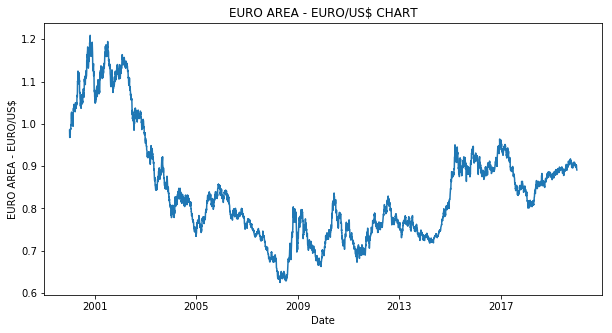

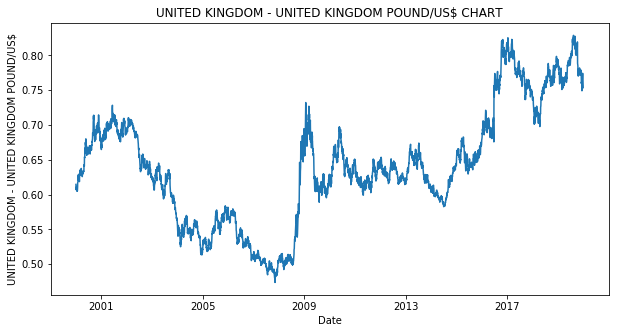

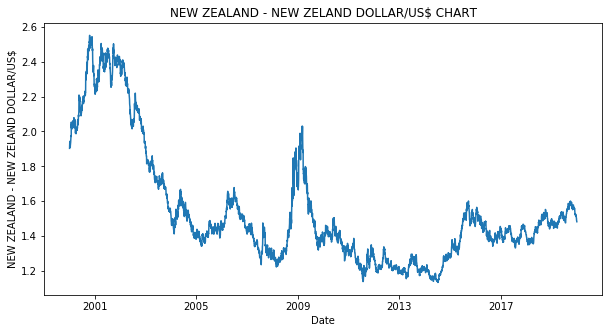

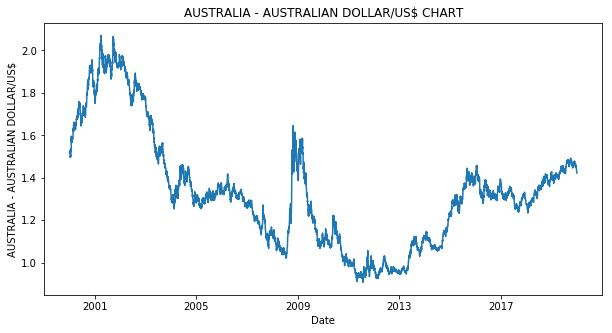

In [20]:
#checking the trends in the dataset
#1.EUR has been appreciting till 2015 when it depreciated from0.75 to 0.94, and has managed to to appreciate as at 2019 to 0.89
#2. Pound appreciated from 2000  to 2009 and ever since has been depreciting in respect to USD till 2019
#3. New zealand has been doing well
#4. it mainted a high value from 2000 - 2003
for col in df.columns.drop(['Year','Quater','Month']):
    plt.figure(figsize=(10,5))
    plt.plot(df[col])
    plt.title(col + ' CHART')
    plt.xlabel('Date')
    plt.ylabel(col)
    plt.show()

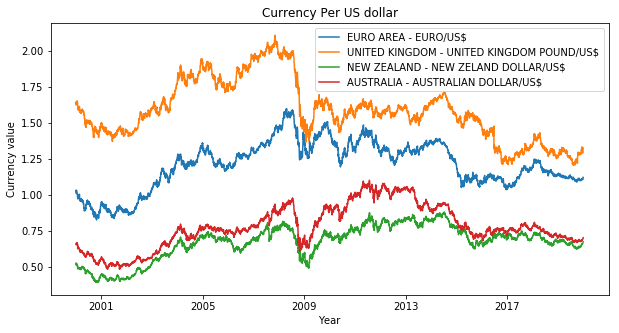

In [21]:
#ploting the USd values of all the four currencies...they follow the same trend

plt.figure(figsize=(10,5))
plt.plot(df_scale['EURO AREA - EURO/US$'])
plt.plot(df_scale['UNITED KINGDOM - UNITED KINGDOM POUND/US$'])
plt.plot(df_scale['NEW ZEALAND - NEW ZELAND DOLLAR/US$'])
plt.plot(df_scale['AUSTRALIA - AUSTRALIAN DOLLAR/US$'])
plt.title('Currency Per US dollar')
plt.xlabel('Year')
plt.ylabel('Currency value')
plt.legend(['EURO AREA - EURO/US$','UNITED KINGDOM - UNITED KINGDOM POUND/US$','NEW ZEALAND - NEW ZELAND DOLLAR/US$',
                  'AUSTRALIA - AUSTRALIAN DOLLAR/US$'])
plt.show()

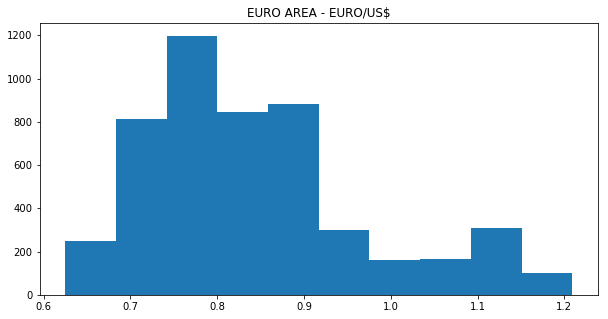

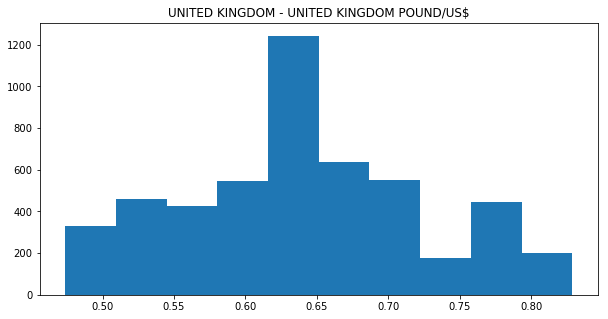

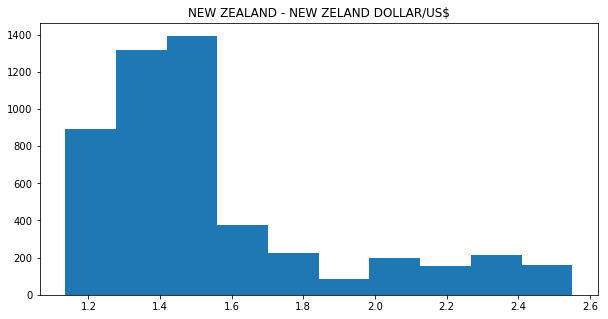

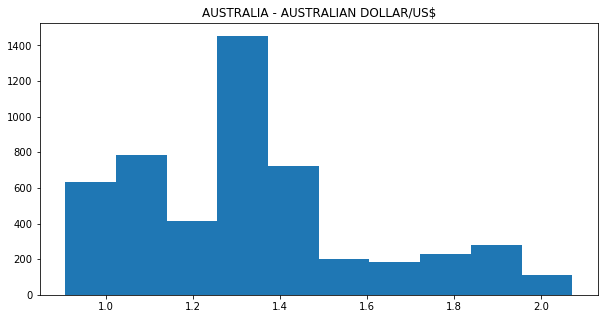

In [22]:
#histogram chart for the currencies
for col in df.columns.drop(['Year','Quater','Month']):
    plt.figure(figsize=(10,5))
    plt.hist(df[col])
    plt.title(col)
    plt.show()

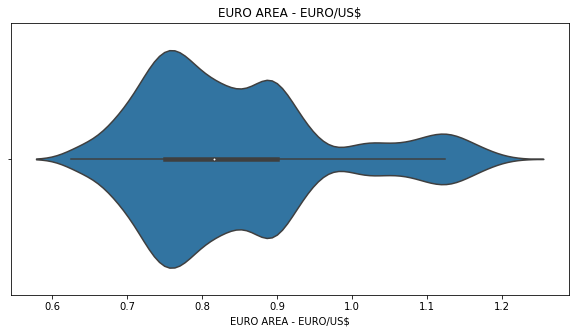

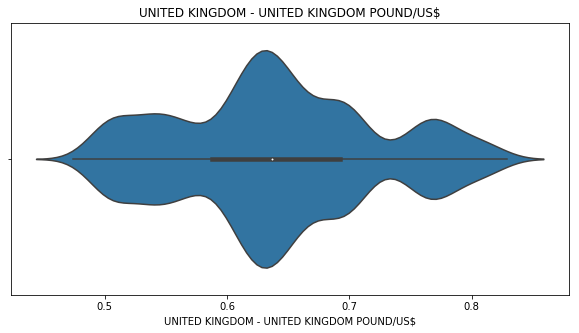

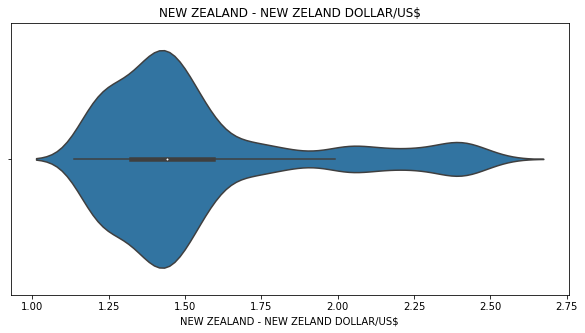

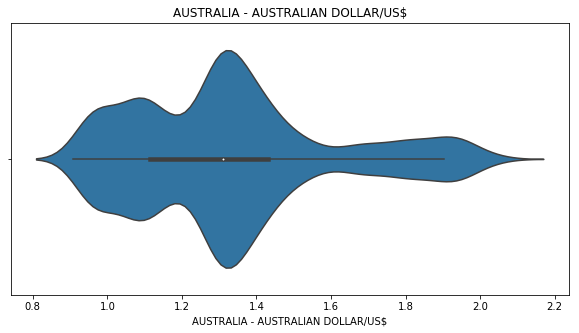

In [23]:
#violin plot
for col in df.columns.drop(['Year','Quater','Month']):
    plt.figure(figsize=(10,5))
    sns.violinplot(df[col])
    plt.title(col)
    plt.show()

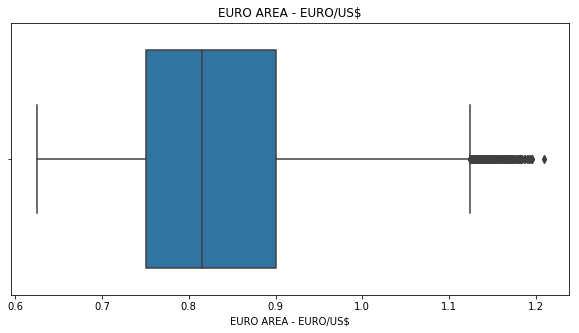

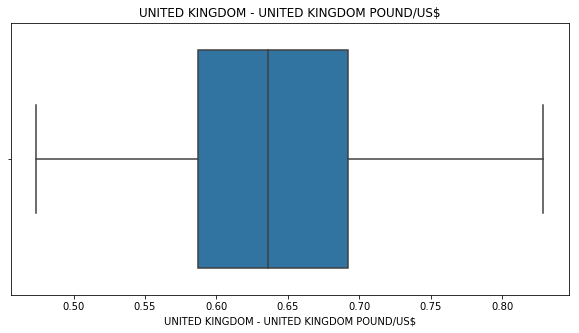

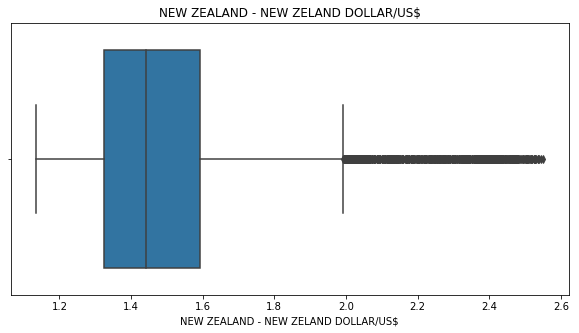

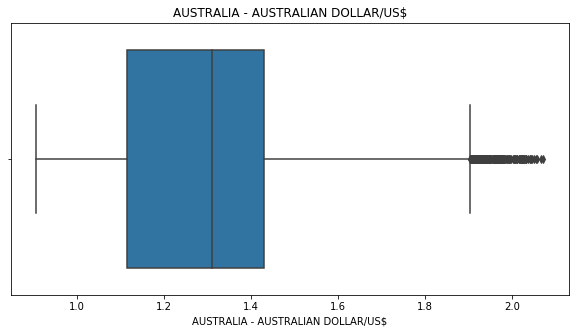

In [24]:
#box plot
for col in df.columns.drop(['Year','Quater','Month']):
    plt.figure(figsize=(10,5))
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

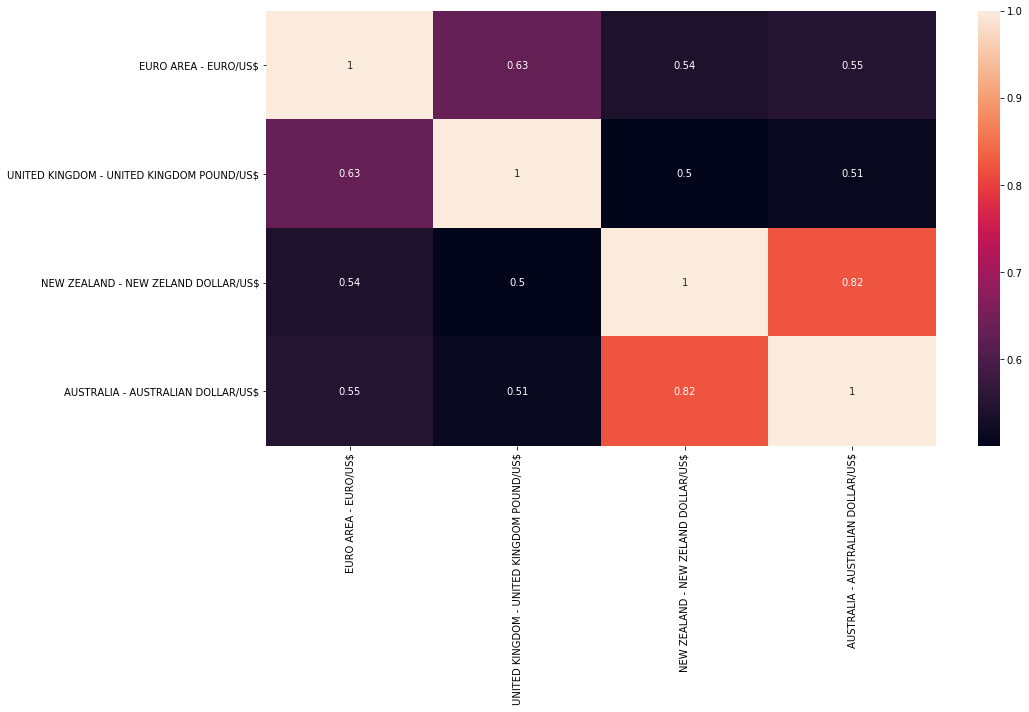

In [25]:
#heat map...New zealand dollar is highly correlated with australian dollar
plt.figure(figsize=(15,8))
sns.heatmap(df.drop(['Year','Quater','Month'],axis=1).pct_change().corr(), annot=True)

In [26]:
#table for the avearge currency values for each quater
df.drop(['Year','Month'], axis=1).groupby(by='Quater').mean()

,EURO AREA - EURO/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,AUSTRALIA - AUSTRALIAN DOLLAR/US$
Quater,,,,
1,0.844840,0.639330,1.545582,1.334997
2,0.845407,0.638104,1.539833,1.325200
3,0.841708,0.640285,1.542270,1.328165
4,0.843682,0.643849,1.547240,1.340083


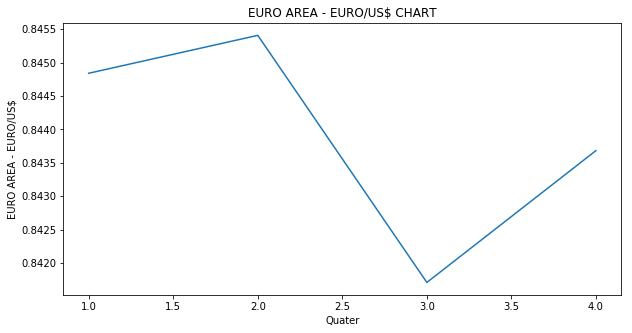

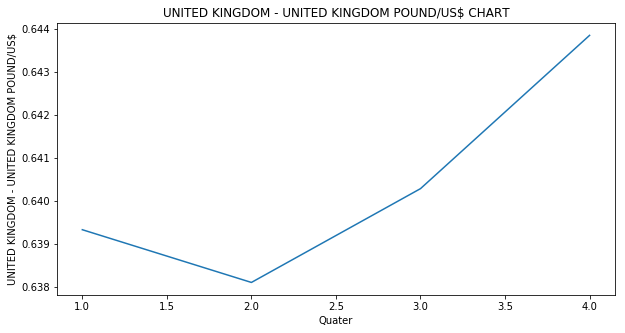

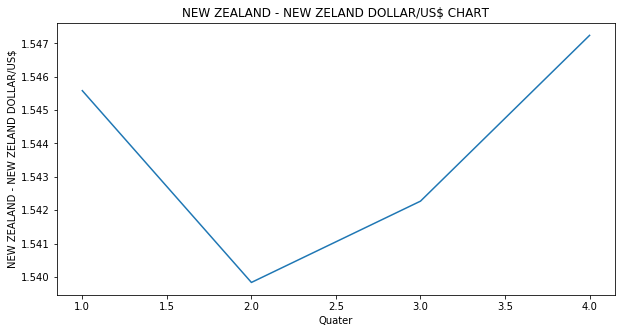

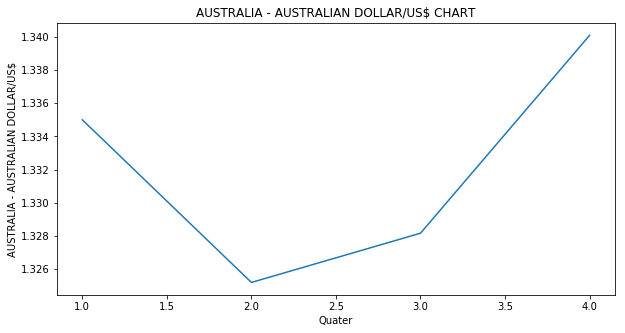

In [27]:
#plotting a line plot to understand the average currrency value for each quater
#there is always inrease in second quater for EURO
for col in df.drop(['Year','Month'], axis=1).groupby(by='Quater').mean().columns:
    plt.figure(figsize=(10,5))
    plt.plot(df.drop(['Year','Month'], axis=1).groupby(by='Quater').mean()[col])
    plt.title(col + ' CHART')
    plt.xlabel('Quater')
    plt.ylabel(col)
    plt.show()

In [28]:
df_scale.drop(['Quater','Month'], axis=1).groupby(by='Year').mean()

,EURO AREA - EURO/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,AUSTRALIA - AUSTRALIAN DOLLAR/US$
Year,,,,
2000,0.923181,1.515581,0.456787,0.581517
2001,0.895202,1.439647,0.420179,0.516944
2002,0.945387,1.502531,0.464459,0.543719
2003,1.132055,1.634661,0.582201,0.652371
2004,1.243815,1.833003,0.664302,0.736471
2005,1.244866,1.820372,0.704923,0.762677
2006,1.256289,1.843366,0.649210,0.753482
2007,1.371063,2.002006,0.736548,0.839132
2008,1.472554,1.854485,0.715144,0.853702


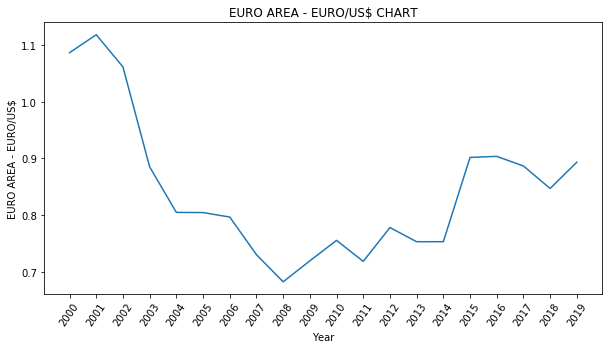

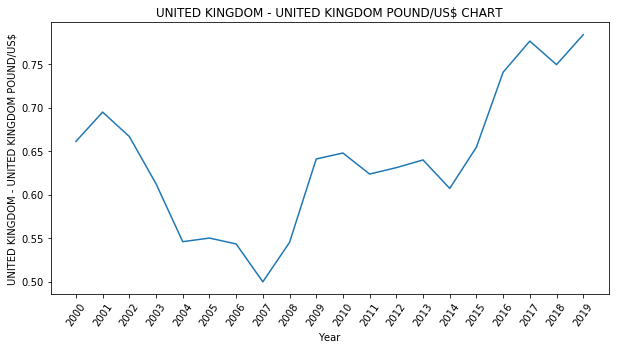

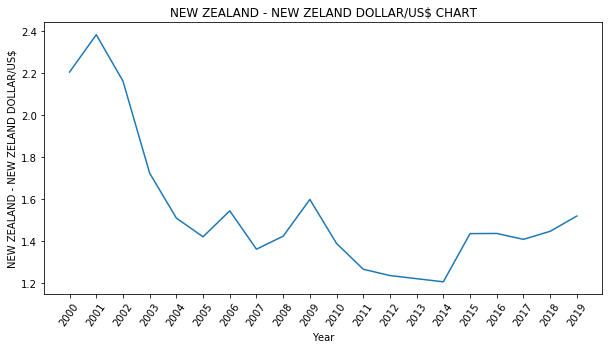

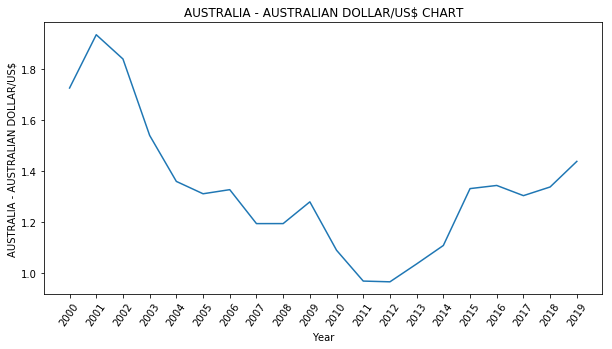

In [29]:
#checking the trend for each year, notice that there is always increase towards december
for col in df.drop(['Quater','Month'], axis=1).groupby(by='Year').mean().columns:
    plt.figure(figsize=(10,5))
    plt.plot(df.drop(['Quater','Month'], axis=1).groupby(by='Year').mean()[col])
    plt.title(col + ' CHART')
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.xticks(range(2000,2020),rotation=55)
    plt.show()

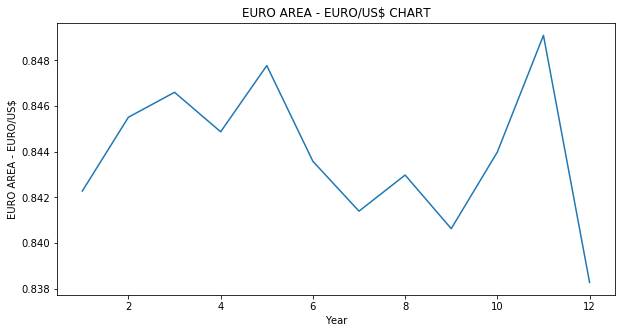

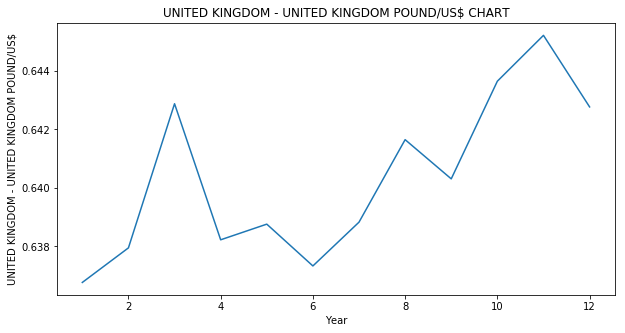

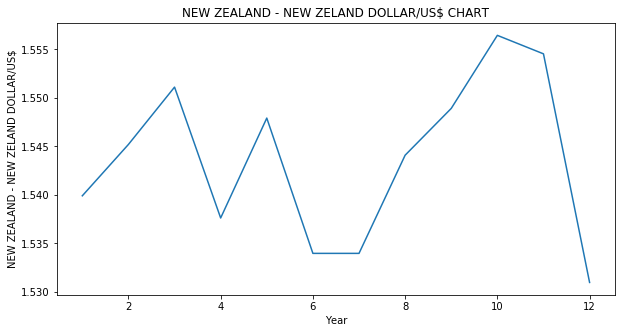

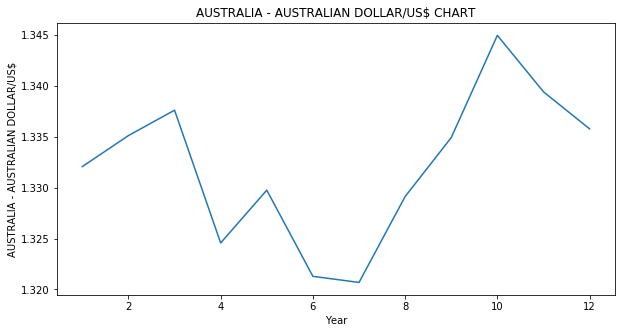

In [30]:
#ploting the trend for the mean currency value for each month..... this confirm that there increase in always in the month of november
for col in df.drop(['Quater','Year'], axis=1).groupby(by='Month').mean().columns:
    plt.figure(figsize=(10,5))
    plt.plot(df.drop(['Quater','Year'], axis=1).groupby(by='Month').mean()[col])
    plt.title(col + ' CHART')
    plt.xlabel('Year')
    plt.ylabel(col)
    plt.show()

# forecasting

In [31]:
#separating the currency separately
euro = df['EURO AREA - EURO/US$']
pound = df['UNITED KINGDOM - UNITED KINGDOM POUND/US$']
nzd = df['NEW ZEALAND - NEW ZELAND DOLLAR/US$']
aud = df['AUSTRALIA - AUSTRALIAN DOLLAR/US$']

In [32]:
#creating a AD fuller functionn to test if the values is statuinary 
#for a time series data to be stationary the p value should be < 0.05, and the test statistics should be lower rgan the critical value
def do_adf_test(series):
    adftest = adfuller(series, autolag= 'AIC')
    adf_result = pd.Series(adftest[0:4], index=['Test Statistics','p-value','#Lags Used','Number of Observation Used'])
    for key, value in adftest[4].items():
        adf_result['Critical values (%s)' %key] = value
    
    print(adf_result)

In [33]:
#testing all currency, it is observed that the timeseries data is not statonary
do_adf_test(euro)

Test Statistics                 -1.612164
p-value                          0.476840
#Lags Used                       5.000000
Number of Observation Used    5013.000000
Critical values (1%)            -3.431655
Critical values (5%)            -2.862117
Critical values (10%)           -2.567077
dtype: float64


In [34]:
do_adf_test(pound)

Test Statistics                 -1.219928
p-value                          0.664965
#Lags Used                      23.000000
Number of Observation Used    4995.000000
Critical values (1%)            -3.431660
Critical values (5%)            -2.862119
Critical values (10%)           -2.567078
dtype: float64


In [35]:
do_adf_test(nzd)

Test Statistics                 -1.648423
p-value                          0.457863
#Lags Used                      11.000000
Number of Observation Used    5007.000000
Critical values (1%)            -3.431657
Critical values (5%)            -2.862117
Critical values (10%)           -2.567077
dtype: float64


In [36]:
do_adf_test(aud)

Test Statistics                 -1.651129
p-value                          0.456452
#Lags Used                      28.000000
Number of Observation Used    4990.000000
Critical values (1%)            -3.431661
Critical values (5%)            -2.862119
Critical values (10%)           -2.567078
dtype: float64


In [38]:
#creating a function to check for autocorrelation
def autocorrelaton_plot(df):
    return autocorrelation_plot(df)

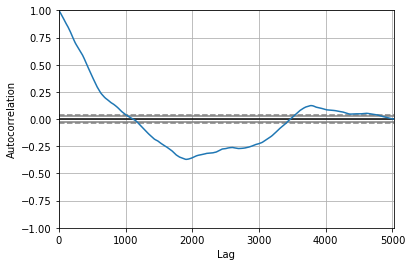

In [39]:
#notice that there is positive and negative correlation in all the currency dataframe
autocorrelation_plot(euro)

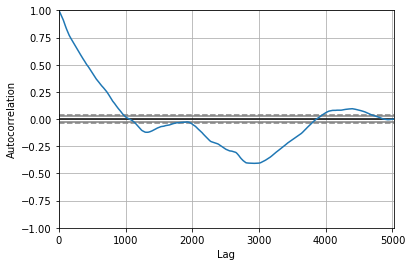

In [40]:
autocorrelation_plot(pound)

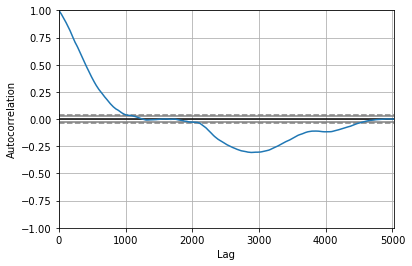

In [41]:
autocorrelation_plot(nzd)

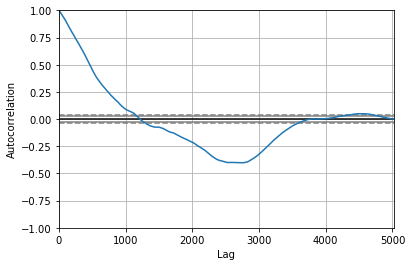

In [42]:
autocorrelation_plot(aud)

# building model

In [124]:
#reseting the index and changing columns name
euro = euro.reset_index()
euro.rename(columns={'Time Serie':'ds','EURO AREA - EURO/US$':'y'},inplace=True)
euro.head()

,ds,y
0,2000-01-03,0.9847
1,2000-01-04,0.9700
2,2000-01-05,0.9676
3,2000-01-06,0.9686
4,2000-01-07,0.9714


In [125]:
pound = pound.reset_index()
pound.rename(columns={'Time Serie':'ds','UNITED KINGDOM - UNITED KINGDOM POUND/US$':'y'},inplace=True)
pound.head()

,ds,y
0,2000-01-03,0.6146
1,2000-01-04,0.6109
2,2000-01-05,0.6092
3,2000-01-06,0.6070
4,2000-01-07,0.6104


In [126]:
nzd = nzd.reset_index()
nzd.rename(columns={'Time Serie':'ds','NEW ZEALAND - NEW ZELAND DOLLAR/US$':'y'},inplace=True)
nzd.head()

,ds,y
0,2000-01-03,1.9033
1,2000-01-04,1.9238
2,2000-01-05,1.9339
3,2000-01-06,1.9436
4,2000-01-07,1.9380


In [127]:
aud = aud.reset_index()
aud.rename(columns={'Time Serie':'ds','AUSTRALIA - AUSTRALIAN DOLLAR/US$':'y'},inplace=True)
aud.head()

,ds,y
0,2000-01-03,1.5172
1,2000-01-04,1.5239
2,2000-01-05,1.5267
3,2000-01-06,1.5291
4,2000-01-07,1.5272


In [128]:
#ceating a function that would split data into training and test set, with data before 2019 used as train test and data after 2019 as test set
def split_data(df):
    train = df[df['ds'] < '2019-01-01'] 
    test = df[df['ds'] >= '2019-01-01']

    return train, test

In [129]:

nzd_train, nzd_test = split_data(nzd)

nzd_train.shape, nzd_test.shape

((4770, 2), (249, 2))

In [130]:
#creating a function that will build a model, train the model, make prediction then return the predicted values
def train_test_prophet(train_data,test_data):
    model = Prophet()
    model.fit(train_data)
    forecast = model.predict(test_data)
    return forecast[['ds','yhat']]

In [131]:
euro_train,euro_test = split_data(euro)
euro_forecast = train_test_prophet(euro_train,euro_test)
euro_forecast.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat
0,2019-01-02,0.841871
1,2019-01-03,0.841826
2,2019-01-04,0.841295
3,2019-01-07,0.840680
4,2019-01-08,0.840665


In [132]:
euro_train.head()

,ds,y
0,2000-01-03,0.9847
1,2000-01-04,0.9700
2,2000-01-05,0.9676
3,2000-01-06,0.9686
4,2000-01-07,0.9714


In [134]:
#create a function to evaluate the performance of the model
def plot_performance(name,train,test, prediction):
  plt.figure(figsize=(10,5))
  train.set_index('ds',drop=True,inplace=True)
  test.set_index('ds',drop=True,inplace=True)
  prediction.set_index('ds',drop=True,inplace=True)
  plt.plot(train['y'])
  plt.plot(test['y'])
  plt.plot(prediction['yhat'])
  plt.xlabel('Date')
  plt.ylabel(name + str('/USD'))
  plt.legend(['train','test','predicted'])
  plt.show()

  print('The mean absolute error for ' + name + ' is :', mean_absolute_error(test['y'].values,prediction['yhat'].values))
  print('The mean squared error for ' + name + ' is : ', mean_squared_error(test['y'].values, prediction['yhat'].values))
  

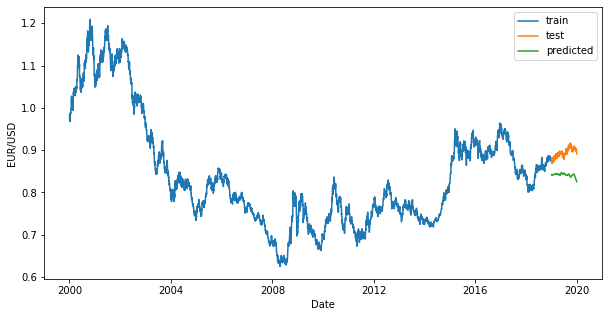

The mean absolute error for EUR is : 0.052294241246066145
The mean squared error for EUR is :  0.0028860002268576985


In [135]:
plot_performance('EUR',euro_train,euro_test,euro_forecast)

In [136]:
pound_train,pound_test = split_data(pound)
pound_forecast = train_test_prophet(pound_train,pound_test)
pound_forecast.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat
0,2019-01-02,0.797643
1,2019-01-03,0.797443
2,2019-01-04,0.797734
3,2019-01-07,0.797669
4,2019-01-08,0.797814


In [137]:
pound_forecast.tail()

,ds,yhat
244,2019-12-24,0.829241
245,2019-12-26,0.829419
246,2019-12-27,0.829911
247,2019-12-30,0.830480
248,2019-12-31,0.830831


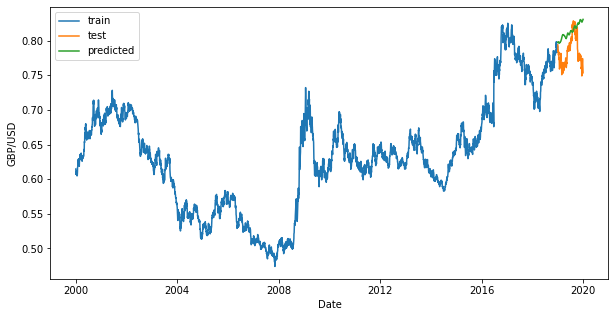

The mean absolute error for GBP is : 0.030984974020624636
The mean squared error for GBP is :  0.001317804282518754


In [138]:
plot_performance('GBP',pound_train,pound_test,pound_forecast)

In [139]:
nzd_train,nzd_test = split_data(nzd)
nzd_forecast = train_test_prophet(nzd_train,nzd_test)
nzd_forecast.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat
0,2019-01-02,1.416137
1,2019-01-03,1.414889
2,2019-01-04,1.413052
3,2019-01-07,1.409841
4,2019-01-08,1.408724


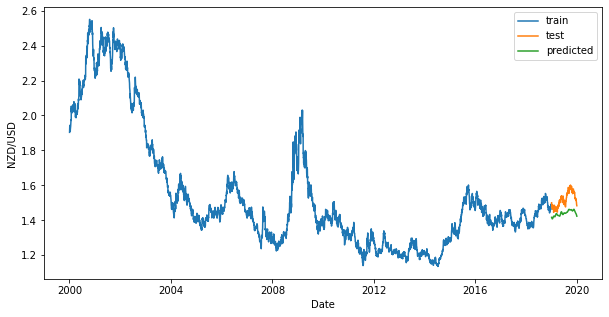

The mean absolute error for NZD is : 0.07874937886778015
The mean squared error for NZD is :  0.0071250916076285985


In [140]:
plot_performance('NZD',nzd_train,nzd_test,nzd_forecast)

In [141]:
aud_train,aud_test = split_data(aud)
aud_forecast = train_test_prophet(aud_train,aud_test)
aud_forecast.head()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat
0,2019-01-02,1.322601
1,2019-01-03,1.321137
2,2019-01-04,1.319901
3,2019-01-07,1.315209
4,2019-01-08,1.313922


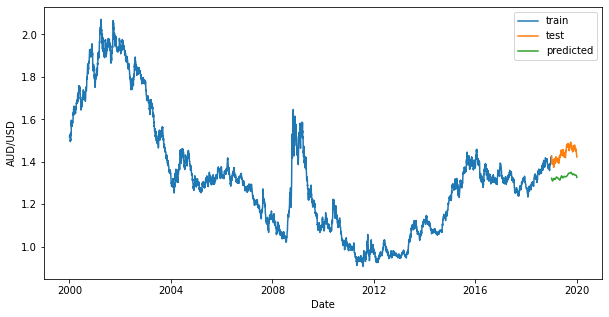

The mean absolute error for AUD is : 0.10825145741490602
The mean squared error for AUD is :  0.012149893273436841


In [142]:
plot_performance('AUD',aud_train,aud_test,aud_forecast)

# future work

In [ ]:
1. more eda like difference between average of previous year
2. apply log transform to see if the data will be stationary
3. try machine learning model like linear regression, random forest regressor